# RTE evolution compatison and amplitude extraction 

In [1]:
import numpy as np
import pandas as pd
import os
import json
import getpass
import logging
import sys
import numpy as np
import datetime
import yaml
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
import glob
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage.filters import gaussian_filter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.patches as mpatches

/tmp/ipykernel_1030/419096481.py:23: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [2]:
df_fills = pd.read_parquet('fills_MD.parquet', engine='pyarrow')

In [3]:
if df_fills['HX:FILLN'].iloc[0] == None:
  df_fills['HX:FILLN'].iloc[0] = df_fills['HX:FILLN'].dropna().iloc[0]
df_fills['HX:FILLN'] = df_fills['HX:FILLN'].ffill(axis=0)


In [4]:
file_path = 'read_rte_data/RTE_Frequence_2023_06.txt'

df_rte = pd.read_csv(file_path, encoding='ISO-8859-1', skiprows=[0], delimiter=';', parse_dates=[0], decimal=',')
df_rte = df_rte.drop([len(df_rte)-1])
df_rte['DATE'] = df_rte.apply(lambda x: pd.to_datetime(str(x['DATE']), format='%d/%m/%Y %H:%M:%S').tz_localize('CET').tz_convert('UTC'), axis=1)
df_rte['TIMESTAMP'] = df_rte['DATE'].apply(lambda x: int(x.timestamp()))
df_rte['FREQUENCE_RETENUE(EN Hz)']=df_rte['FREQUENCE_RETENUE(EN Hz)'].astype(float)


In [5]:
fills = ['8957']
beam_plane = 'B1H'
pickup = 'Q7'
position = 1
print(fills[0])
fill_nb =fills[0]
df = pd.read_parquet('/eos/user/a/aradosla/SWAN_projects/Analysis/ADTObsBox_analysis/results/run_2023/FFT_Fill8957_Q7_B1H1.parquet')
display(df)

8957


,fourier,time,pu,bunches
0,None,2023-06-16 22:34:51.520885+00:00,Q7,0
0,None,2023-06-16 22:35:49.798529+00:00,Q7,0
0,"[393.90434646606445, 147.5201406526949, 21.805...",2023-06-16 22:36:53.903935+00:00,Q7,8
0,"[119.50260543823242, 14.173372524748208, 18.72...",2023-06-16 22:37:52.181582+00:00,Q7,8
0,"[229.85608673095703, 25.658271251515448, 26.40...",2023-06-16 22:38:50.459225+00:00,Q7,8
...,...,...,...,...
0,"[776.4228740692139, 1.1403269249236594, 2.2821...",2023-06-17 01:50:51.930379+00:00,Q7,80
0,"[805.2511932373047, 1.4950291183297515, 0.4058...",2023-06-17 01:51:50.207905+00:00,Q7,80
0,"[789.3097381591797, 2.4361442344003787, 1.3925...",2023-06-17 01:52:54.313185+00:00,Q7,80
0,"[782.898935699463, 3.9041772290051244, 2.10457...",2023-06-17 01:53:52.590710+00:00,Q7,80


In [6]:
df.set_index("time", inplace=True)
dff = df.dropna()


                    HX:BMODE HX:FILLN LHC.BQM.B1:NO_BUNCHES  \
1686952800891564000     None     8957                     8   
1686952800891712000     None     8957                  None   
1686952801991565000     None     8957                     8   
1686952801991726000     None     8957                  None   
1686952803091561000     None     8957                     8   
...                      ...      ...                   ...   
1686966905391713000     None     8957                  None   
1686966906491394000     None     8957                     0   
1686966906491707000     None     8957                  None   
1686966907591389000     None     8957                     0   
1686966907591703000     None     8957                  None   

                    LHC.BQM.B2:NO_BUNCHES  
1686952800891564000                  None  
1686952800891712000                     8  
1686952801991565000                  None  
1686952801991726000                     8  
1686952803091561000    

/tmp/ipykernel_1030/4047054964.py:50: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  idx.append(np.where(amp_strip[amp][:]==max_amp)[0])


<IPython.core.display.Javascript object>


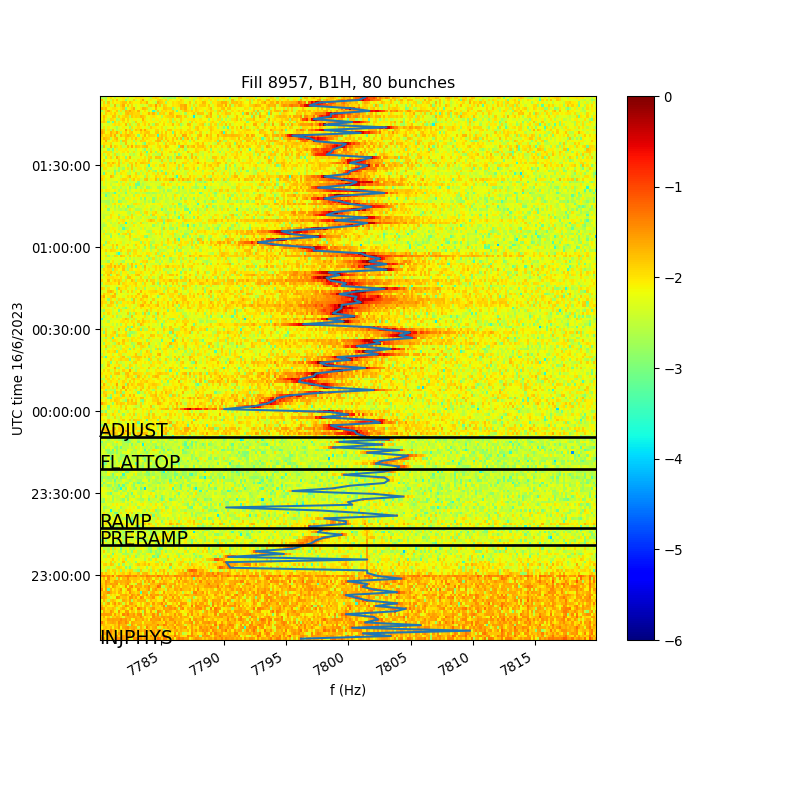

2023-06-16 22:34:51.114238525
2023-06-16 23:11:19.747988525
2023-06-16 23:17:29.379738525
2023-06-16 23:38:47.330488525
2023-06-16 23:50:48.124238525
prob STABLE


<IPython.core.display.Javascript object>


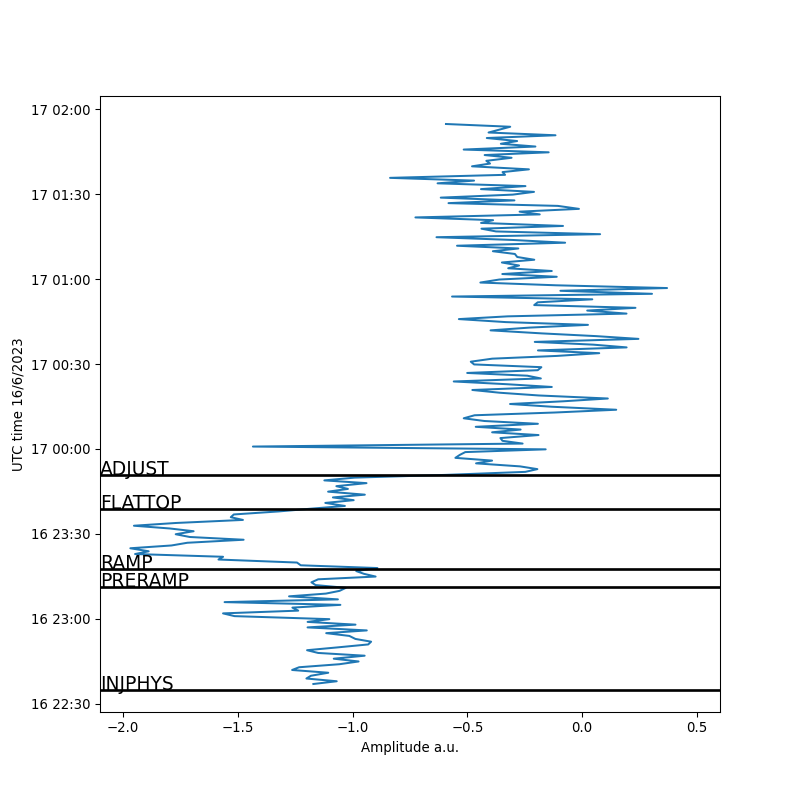

prob STABLE


In [7]:
%matplotlib notebook
df_fills = pd.read_parquet('fills_MD.parquet', engine='pyarrow')

if df_fills['HX:FILLN'].iloc[0] == None:
    df_fills['HX:FILLN'].iloc[0] = df_fills['HX:FILLN'].dropna().iloc[0]
df_fills['HX:FILLN'] = df_fills['HX:FILLN'].ffill(axis=0)

f_range = 20
line =7800

for fill_nb in fills:
    
    for beam_plane in ['B1H']: #, 'B2H', 'B1V', 'B2V']:
    
        x_lims = mdates.date2num(dff.index.values)

        df_fills = df_fills[df_fills['HX:FILLN'] == fill_nb]
        print(df_fills)
        
        df_fills.index = [pd.Timestamp(df_fills.index[i]) for i in range(len(df_fills))]
        print(df_fills.index)
      

        df_bunches = df_fills[f'LHC.BQM.B{beam_plane[1:2]}:NO_BUNCHES'].dropna().astype(int)
        print(df_bunches)
        bunches = df_bunches.max()

        for counter, ii in enumerate(range(line-f_range, line+f_range,f_range*2)):#(range(0, 5000,200)):
            x_lims = mdates.date2num(dff.index.values) 
            
            my_dpi=96
            frev=11245.5
            freqs = np.linspace(0, frev*2., len(dff["fourier"].iloc[0]))

            fourier_abs = np.array(dff.fourier.to_list()) 
           

            ################################################
            myfilter = (freqs>ii) & (freqs<ii+f_range*2)
            line =7800
            
            myfilter_strip = (freqs>line-f_range/2) & (freqs<line+f_range/2)                #filter for the frequency strip selection, around f = 100Hz
  
            amp_strip = np.array(np.log10(fourier_abs)[:, myfilter_strip])     #all amplitudes in the selected frequency domain
                                                                               #same expression as the heatmap color
            max_amp = []
            idx = []
            for amp in range(len(amp_strip)):                                  #loop for calculating all the max amp values in the selected domain
                max_amp.append(amp_strip[amp][:].max())
                idx.append(np.where(amp_strip[amp][:]==max_amp)[0])
            
            idx=[]
            for i in range(len(amp_strip)):
                idx.append(np.where(amp_strip[i][:] == max_amp[i])[0].tolist())

            myfreq = freqs[myfilter_strip]
        
            f = ['']*len(idx)
            for i in range(len(idx)):
                f[i] = myfreq[idx[i]].tolist()
            
            fig, ax = plt.subplots(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
            plt.pcolormesh(freqs[myfilter], dff.index.values, np.array(np.log10(fourier_abs)[:, myfilter]), cmap='jet', shading='auto', vmin = -6, vmax = 0)
            plt.xlim(freqs[myfilter][0], freqs[myfilter][-1])
            plt.plot(f[:], dff.index.values[:])
            plt.colorbar()
            ax.yaxis_date()
            date_format = mdates.DateFormatter('%H:%M:%S')
            ax.yaxis.set_major_formatter(date_format)
            plt.title(f'Fill {fill_nb}, {beam_plane}, {bunches} bunches')
            fig.autofmt_xdate()
            plt.xlabel('f (Hz)')
            plt.ylabel(f"UTC time {dff.index[0].day}/{dff.index[0].month}/{dff.index[0].year}")

            for mode in ["INJPHYS","PRERAMP", "RAMP", "FLATTOP", "ADJUST", "STABLE"]:#, "SQUEEZE"]:
                try:
                    tt=pd.Timestamp(df_fills[df_fills["HX:BMODE"] == mode].iloc[0].name)
                    print(tt)
                    plt.axhline(tt, c='k', lw=2)
                    plt.text(ii, tt, mode, c='k', fontsize=14)
                except:
                    print('prob', mode)
            plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
            
            plt.plot(max_amp, dff.index.values)
            #plt.vlines(100, df.index[0], df.index[-1], color = 'black')
            plt.xlabel('Amplitude a.u.')
            ax.yaxis_date()
            date_format = mdates.DateFormatter('%H:%M:%S')
            ax.yaxis.set_major_formatter(date_format)
            plt.xlim(-2.1,0.6)
            plt.ylabel(f"UTC time {dff.index[0].day}/{dff.index[0].month}/{dff.index[0].year}")
            if True:
                for mode in ["INJPHYS","PRERAMP", "RAMP", "FLATTOP", "ADJUST", "STABLE"]:#, "SQUEEZE"]:
                    try:
                        tt=pd.Timestamp(df_fills[df_fills["HX:BMODE"] == mode].iloc[0].name)
                        plt.axhline(tt, c='k', lw=2)
                        plt.text(-2.1, tt, mode, c='k', fontsize=14)
                    except:
                        print('prob', mode)
            plt.show()

In [8]:
idx=[]
for i in range(len(amp_strip)):
    idx.append(np.where(amp_strip[i][:] == max_amp[i])[0].tolist())

myfreq = freqs[myfilter_strip]
f = ['']*len(idx)

for i in range(len(idx)):
    f[i] = myfreq[idx[i]].tolist()